In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import os

In [3]:
health_centers = pd.read_csv(os.path.join("..","Data","Cleaned_Files","Health_Center_Data_2016_to_2018.csv"))
health_centers

Health_Center_Name            City  \
0                      ALASKA ISLAND COMMUNITY SERVICES        WRANGELL   
1                 ALEUTIAN PRIBILOF ISLAND ASSOCIATIONS       ANCHORAGE   
2                  ANCHORAGE NEIGHBORHOOD HEALTH CENTER       ANCHORAGE   
3                                  BETHEL FAMILY CLINIC          BETHEL   
4                   BRISTOL BAY AREA HEALTH CORPORATION      DILLINGHAM   
5                                   BRISTOL BAY BOROUGH          NAKNEK   
6               COUNCIL OF ATHABASCAN TRIBAL GOVERNMENT      FORT YUKON   
7                             CROSS ROAD MEDICAL CENTER      GLENNALLEN   
8                          EASTERN ALEUTIAN TRIBES, INC       ANCHORAGE   
9                                GIRDWOOD HEALTH CLINIC        GIRDWOOD   
10            ILIULIUK FAMILY AND HEALTH SERVICES, INC.        UNALASKA   
11                     INTERIOR COMMUNITY HEALTH CENTER       FAIRBANKS   
12                       KODIAK AREA NATIVE ASSOCIATION          KODIAK   
13                 KODIAK ISLAND HEALTH CARE FOUNDATION          KODIAK   
14                                 MANILLAQ ASSOCIATION        KOTZEBUE   
15                         MAT-SU HEALTH SERVICES, INC.         WASILLA   
16                              MUNICIPALITY OF SKAGWAY         SKAGWAY   
17                               NATIVE VILLAGE OF EYAK         CORDOVA   
18                      NORTON SOUND HEALTH CORPORATION            NOME   
19    PENINSULA COMMUNITY HEALTH SERVICES OF ALASKA,...        SOLDOTNA   
20                               SELDOVIA VILLAGE TRIBE        SELDOVIA   
21                                      SEWARD, CITY OF          SEWARD   
22                              SOUTHCENTRAL FOUNDATION       ANCHORAGE   
23             SOUTHEAST ALASKA REGIONAL HEALTH CONSORT           SITKA   
24              SUNSHINE COMMUNITY HEALTH  CENTER, INC.       TALKEETNA   
25                             TANANA CHIEFS CONFERENCE       FAIRBANKS   
26                                YAKUTAT TLINGIT TRIBE         YAKUTAT   
27                   YUKON KUSKOKWIM HEALTH CORPORATION          BETHEL   
28                    ALABAMA REGIONAL MEDICAL SERVICES      BIRMINGHAM   
29    BAYOU LA BATRE AREA HEALTH DEVELOPMENT BOARD, ...  BAYOU LA BATRE   
...                                                 ...             ...   
8150                    CABIN CREEK HEALTH CENTER, INC.           DAWES   
8151             CAMDEN-ON-GAULEY MEDICAL CENTER, INC.    CAMDEN ON GLY   
8152                                       CHANGE, INC.         WEIRTON   
8153               CLAY BATTELLE HEALTH SERVICES ASSOC.     BLACKSVILLE   
8154                    COMMUNITY CARE OF WEST VIRGINIA       ROCK CAVE   
8155                     E.A. HAWSE HEALTH CENTER, INC.           BAKER   
8156                 LINCOLN COUNTY PRIMARY CARE CENTER          HAMLIN   
8157           MINNIE HAMILTON HEALTH CARE CENTER, INC.     GRANTSVILLE   
8158                 MONONGAHELA VALLEY ASSOCIATION OF         FAIRMONT   
8159                        MONROE COUNTY HEALTH CENTER           UNION   
8160                NEW RIVER HEALTH ASSOCIATION, INC.          SCARBRO   
8161                           PENDLETON COMMUNITY CARE        FRANKLIN   
8162      PRESTON-TAYLOR COMMUNITY HEALTH CENTERS, INC.         GRAFTON   
8163                      RAINELLE MEDICAL CENTER, INC.        RAINELLE   
8164          RITCHIE COUNTY PRIMARY CARE ASSOC., INC.      HARRISVILLE   
8165                  ROANE CO. FAMILY HLTH CARE, INC.          SPENCER   
8166            SHENANDOAH VALLEY MEDICAL SYSTEMS, INC.     MARTINSBURG   
8167                    ST. GEORGE MEDICAL CLINIC, INC.       ST GEORGE   
8168                TUG RIVER HEALTH ASSOCIATION, INC.             GARY   
8169                          VALLEY HEALTH CARE, INC.       MILL CREEK   
8170                        VALLEY HEALTH SYSTEMS, INC.      HUNTINGTON   
8171              WILLIAMSON HEALTH AND WELLNESS CENTER      W

In [8]:
health_centers_id = health_centers.assign(id=(health_centers['Health_Center_Name'] + '_' + health_centers['County'] + '_' + health_centers['State']).astype('category').cat.codes)
health_centers_id.head()

Health_Center_Name        City   State  \
0       ALASKA ISLAND COMMUNITY SERVICES    WRANGELL  Alaska   
1  ALEUTIAN PRIBILOF ISLAND ASSOCIATIONS   ANCHORAGE  Alaska   
2   ANCHORAGE NEIGHBORHOOD HEALTH CENTER   ANCHORAGE  Alaska   
3                   BETHEL FAMILY CLINIC      BETHEL  Alaska   
4    BRISTOL BAY AREA HEALTH CORPORATION  DILLINGHAM  Alaska   

                County  Year Abr  Total_Patients  Children  Adults_under_65  \
0  Wrangell-Petersburg  2016  AK            3062  0.217832         0.618877   
1            Anchorage  2016  AK             458  0.233624         0.648472   
2            Anchorage  2016  AK           13184  0.124393         0.702897   
3               Bethel  2016  AK            3792  0.667721         0.307753   
4           Dillingham  2016  AK            5649  0.322535         0.593025   

   Older_Adults  ...  Adolescent_Weight_Screening_and_Follow Up  \
0      0.163292  ...                                   0.214286   
1      0.117904  ...                                   0.000000   
2      0.172709  ...                                   0.500000   
3      0.024525  ...                                   0.001717   
4      0.084440  ...                                   0.019776   

   Adult_Weight_Screening_and_Follow Up  Colorectal_Cancer_Screening  \
0                              0.293086                     0.111487   
1                              0.050562                     1.000000   
2                              0.264292                     0.240799   
3                              0.749554                     0.007160   
4                              0.311701                     0.509917   

   Childhood_Immunization  Appropriate_Asthma_Treatment_Plan  \
0                0.277778                           0.977778   
1                1.000000                           1.000000   
2                0.341667                           0.942857   
3                0.361111                           0.875000   
4                0.317073                           1.000000   

   Cholesterol_Treatment_Lipid_Therapy_CAD  \
0                                 0.775000   
1                                 1.000000   
2                                 0.811159   
3                                 0.818182   
4                                 0.422535   

   Heart_Attack_Stroke_Treatment_Aspirin_IVD  Blood_Pressure_Control  \
0                                   0.873874                0.676000   
1                                   0.230769                0.746032   
2                                   0.728571                0.571288   
3                                   0.750000                0.616000   
4                                   0.587786                0.514664   

   Total_Cost_per_Patient   id  
0               2215.0270   19  
1               7786.9740   24  
2               1236.5980   37  
3                715.4225   94  
4               1903.0150  114  

[5 rows x 49 columns]

In [12]:
health_centers_id['County-State-Year'] = health_centers_id["County"] + "-" + health_centers_id["State"] + "-" + health_centers_id['Year'].astype(str)
health_centers_id

Health_Center_Name            City  \
0                      ALASKA ISLAND COMMUNITY SERVICES        WRANGELL   
1                 ALEUTIAN PRIBILOF ISLAND ASSOCIATIONS       ANCHORAGE   
2                  ANCHORAGE NEIGHBORHOOD HEALTH CENTER       ANCHORAGE   
3                                  BETHEL FAMILY CLINIC          BETHEL   
4                   BRISTOL BAY AREA HEALTH CORPORATION      DILLINGHAM   
5                                   BRISTOL BAY BOROUGH          NAKNEK   
6               COUNCIL OF ATHABASCAN TRIBAL GOVERNMENT      FORT YUKON   
7                             CROSS ROAD MEDICAL CENTER      GLENNALLEN   
8                          EASTERN ALEUTIAN TRIBES, INC       ANCHORAGE   
9                                GIRDWOOD HEALTH CLINIC        GIRDWOOD   
10            ILIULIUK FAMILY AND HEALTH SERVICES, INC.        UNALASKA   
11                     INTERIOR COMMUNITY HEALTH CENTER       FAIRBANKS   
12                       KODIAK AREA NATIVE ASSOCIATION          KODIAK   
13                 KODIAK ISLAND HEALTH CARE FOUNDATION          KODIAK   
14                                 MANILLAQ ASSOCIATION        KOTZEBUE   
15                         MAT-SU HEALTH SERVICES, INC.         WASILLA   
16                              MUNICIPALITY OF SKAGWAY         SKAGWAY   
17                               NATIVE VILLAGE OF EYAK         CORDOVA   
18                      NORTON SOUND HEALTH CORPORATION            NOME   
19    PENINSULA COMMUNITY HEALTH SERVICES OF ALASKA,...        SOLDOTNA   
20                               SELDOVIA VILLAGE TRIBE        SELDOVIA   
21                                      SEWARD, CITY OF          SEWARD   
22                              SOUTHCENTRAL FOUNDATION       ANCHORAGE   
23             SOUTHEAST ALASKA REGIONAL HEALTH CONSORT           SITKA   
24              SUNSHINE COMMUNITY HEALTH  CENTER, INC.       TALKEETNA   
25                             TANANA CHIEFS CONFERENCE       FAIRBANKS   
26                                YAKUTAT TLINGIT TRIBE         YAKUTAT   
27                   YUKON KUSKOKWIM HEALTH CORPORATION          BETHEL   
28                    ALABAMA REGIONAL MEDICAL SERVICES      BIRMINGHAM   
29    BAYOU LA BATRE AREA HEALTH DEVELOPMENT BOARD, ...  BAYOU LA BATRE   
...                                                 ...             ...   
8150                    CABIN CREEK HEALTH CENTER, INC.           DAWES   
8151             CAMDEN-ON-GAULEY MEDICAL CENTER, INC.    CAMDEN ON GLY   
8152                                       CHANGE, INC.         WEIRTON   
8153               CLAY BATTELLE HEALTH SERVICES ASSOC.     BLACKSVILLE   
8154                    COMMUNITY CARE OF WEST VIRGINIA       ROCK CAVE   
8155                     E.A. HAWSE HEALTH CENTER, INC.           BAKER   
8156                 LINCOLN COUNTY PRIMARY CARE CENTER          HAMLIN   
8157           MINNIE HAMILTON HEALTH CARE CENTER, INC.     GRANTSVILLE   
8158                 MONONGAHELA VALLEY ASSOCIATION OF         FAIRMONT   
8159                        MONROE COUNTY HEALTH CENTER           UNION   
8160                NEW RIVER HEALTH ASSOCIATION, INC.          SCARBRO   
8161                           PENDLETON COMMUNITY CARE        FRANKLIN   
8162      PRESTON-TAYLOR COMMUNITY HEALTH CENTERS, INC.         GRAFTON   
8163                      RAINELLE MEDICAL CENTER, INC.        RAINELLE   
8164          RITCHIE COUNTY PRIMARY CARE ASSOC., INC.      HARRISVILLE   
8165                  ROANE CO. FAMILY HLTH CARE, INC.          SPENCER   
8166            SHENANDOAH VALLEY MEDICAL SYSTEMS, INC.     MARTINSBURG   
8167                    ST. GEORGE MEDICAL CLINIC, INC.       ST GEORGE   
8168                TUG RIVER HEALTH ASSOCIATION, INC.             GARY   
8169                          VALLEY HEALTH CARE, INC.       MILL CREEK   
8170                        VALLEY HEALTH SYSTEMS, INC.      HUNTINGTON   
8171              WILLIAMSON HEALTH AND WELLNESS CENTER      W

In [32]:
health_centers_duplicates = health_centers_id[health_centers_id.duplicated()]
health_centers_duplicates

Empty DataFrame
Columns: [Health_Center_Name, City, State, County, Year, Abr, Total_Patients, Children, Adults_under_65, Older_Adults, Racial_Ethnic_Minority, Hispanic_Latino_Ethnicity, African_American, Asian, American_Indian_Alaskan_Native, Native_Hawaiian_Other_Pacific_Islander, More_than_one_race, Best_Served_in_another_language, Patients_at_or_below_200Pct_Poverty, Patients_at_or_below_100Pct_Poverty, Uninsured, Medicaid_CHIP, Medicare, Other_Third_Party, Medical_Services, Dental_Services, Mental_Health_Services, Substance_Abuse_Services, Vision_Services, Enabling_Services, Pct_Pts_with_Hypertension, Pct_Pts_with_Diabetes, Pct_Pts_with_Asthma, Pct_Pts_with_HIV, Prenatal_Patients, Prenatal_Patients_who_delivered, Acces_to_Prenatal_Care, Pct_Births_with_Low_Birth_Weight, Cervical_Cancer_Screening, Adolescent_Weight_Screening_and_Follow Up, Adult_Weight_Screening_and_Follow Up, Colorectal_Cancer_Screening, Childhood_Immunization, Appropriate_Asthma_Treatment_Plan, Cholesterol_Treatment_Lipid_Therapy_CAD, Heart_Attack_Stroke_Treatment_Aspirin_IVD, Blood_Pressure_Control, Total_Cost_per_Patient, id, County-State-Year]
Index: []

[0 rows x 50 columns]

In [13]:
all_county_ranks = pd.read_csv(os.path.join("..","Data","Cleaned_Files","All_Years_County_Health_Ranking_Data.csv"))
all_county_ranks

FIPS      State County/Borough/Parish  Year Health_Outcomes_Rank  \
0       1000.0    Alabama                     0  2020                    0   
1       1001.0    Alabama               Autauga  2020                  6.0   
2       1003.0    Alabama               Baldwin  2020                  2.0   
3       1005.0    Alabama               Barbour  2020                 45.0   
4       1007.0    Alabama                  Bibb  2020                 34.0   
5       1009.0    Alabama                Blount  2020                 24.0   
6       1011.0    Alabama               Bullock  2020                 56.0   
7       1013.0    Alabama                Butler  2020                 64.0   
8       1015.0    Alabama               Calhoun  2020                 42.0   
9       1017.0    Alabama              Chambers  2020                 44.0   
10      1019.0    Alabama              Cherokee  2020                 37.0   
11      1021.0    Alabama               Chilton  2020                 15.0   
12      1023.0    Alabama               Choctaw  2020                 52.0   
13      1025.0    Alabama                Clarke  2020                 49.0   
14      1027.0    Alabama                  Clay  2020                 25.0   
15      1029.0    Alabama              Cleburne  2020                 21.0   
16      1031.0    Alabama                Coffee  2020                  4.0   
17      1033.0    Alabama               Colbert  2020                 20.0   
18      1035.0    Alabama               Conecuh  2020                 53.0   
19      1037.0    Alabama                 Coosa  2020                 55.0   
20      1039.0    Alabama             Covington  2020                 38.0   
21      1041.0    Alabama              Crenshaw  2020                 18.0   
22      1043.0    Alabama               Cullman  2020                 16.0   
23      1045.0    Alabama                  Dale  2020                 23.0   
24      1047.0    Alabama                Dallas  2020                 65.0   
25      1049.0    Alabama                DeKalb  2020                 29.0   
26      1051.0    Alabama                Elmore  2020                  8.0   
27      1053.0    Alabama              Escambia  2020                 50.0   
28      1055.0    Alabama                Etowah  2020                 39.0   
29      1057.0    Alabama               Fayette  2020                 19.0   
...        ...        ...                   ...   ...                  ...   
19120  55131.0  Wisconsin            Washington  2015                 12.0   
19121  55133.0  Wisconsin              Waukesha  2015                 14.0   
19122  55135.0  Wisconsin               Waupaca  2015                 55.0   
19123  55137.0  Wisconsin              Waushara  2015                 60.0   
19124  55139.0  Wisconsin             Winnebago  2015                 42.0   
19125  55141.0  Wisconsin                  Wood  2015                 16.0   
19126  56000.0    Wyoming                     0  2015                    0   
19127  56001.0    Wyoming                Albany  2015                  7.0   
19128  56003.0    Wyoming              Big Horn  2015                 10.0   
19129  56005.0    Wyoming              Campbell  2015                 11.0   
19130  56007.0    Wyoming                Carbon  2015                 14.0   
19131  56009.0    Wyoming              Converse  2015                 12.0   
19132  56011.0    Wyoming                 Crook  2015                  6.0   
19133  56013.0    Wyoming               Fremont  2015                 23.0   
19134  56015.0    Wyoming                Goshen  2015                  9.0   
19135  56017.0    Wyoming           Hot Springs  2015                 22.0   
19136  56019.0    Wyoming               Johnson  2015                  4.0   
19137  56021.0    Wyoming               Laramie  2015                 16.0   
19138  56023.0    Wyoming               Lincoln  2015                  8.0   
19139  56025.0    Wyoming       

In [15]:
all_county_ranks['County-State-Year'] = all_county_ranks['County/Borough/Parish'] + "-" + all_county_ranks['State'] + "-" + all_county_ranks['Year'].astype(str)
all_county_ranks

FIPS      State County/Borough/Parish  Year Health_Outcomes_Rank  \
0       1000.0    Alabama                     0  2020                    0   
1       1001.0    Alabama               Autauga  2020                  6.0   
2       1003.0    Alabama               Baldwin  2020                  2.0   
3       1005.0    Alabama               Barbour  2020                 45.0   
4       1007.0    Alabama                  Bibb  2020                 34.0   
5       1009.0    Alabama                Blount  2020                 24.0   
6       1011.0    Alabama               Bullock  2020                 56.0   
7       1013.0    Alabama                Butler  2020                 64.0   
8       1015.0    Alabama               Calhoun  2020                 42.0   
9       1017.0    Alabama              Chambers  2020                 44.0   
10      1019.0    Alabama              Cherokee  2020                 37.0   
11      1021.0    Alabama               Chilton  2020                 15.0   
12      1023.0    Alabama               Choctaw  2020                 52.0   
13      1025.0    Alabama                Clarke  2020                 49.0   
14      1027.0    Alabama                  Clay  2020                 25.0   
15      1029.0    Alabama              Cleburne  2020                 21.0   
16      1031.0    Alabama                Coffee  2020                  4.0   
17      1033.0    Alabama               Colbert  2020                 20.0   
18      1035.0    Alabama               Conecuh  2020                 53.0   
19      1037.0    Alabama                 Coosa  2020                 55.0   
20      1039.0    Alabama             Covington  2020                 38.0   
21      1041.0    Alabama              Crenshaw  2020                 18.0   
22      1043.0    Alabama               Cullman  2020                 16.0   
23      1045.0    Alabama                  Dale  2020                 23.0   
24      1047.0    Alabama                Dallas  2020                 65.0   
25      1049.0    Alabama                DeKalb  2020                 29.0   
26      1051.0    Alabama                Elmore  2020                  8.0   
27      1053.0    Alabama              Escambia  2020                 50.0   
28      1055.0    Alabama                Etowah  2020                 39.0   
29      1057.0    Alabama               Fayette  2020                 19.0   
...        ...        ...                   ...   ...                  ...   
19120  55131.0  Wisconsin            Washington  2015                 12.0   
19121  55133.0  Wisconsin              Waukesha  2015                 14.0   
19122  55135.0  Wisconsin               Waupaca  2015                 55.0   
19123  55137.0  Wisconsin              Waushara  2015                 60.0   
19124  55139.0  Wisconsin             Winnebago  2015                 42.0   
19125  55141.0  Wisconsin                  Wood  2015                 16.0   
19126  56000.0    Wyoming                     0  2015                    0   
19127  56001.0    Wyoming                Albany  2015                  7.0   
19128  56003.0    Wyoming              Big Horn  2015                 10.0   
19129  56005.0    Wyoming              Campbell  2015                 11.0   
19130  56007.0    Wyoming                Carbon  2015                 14.0   
19131  56009.0    Wyoming              Converse  2015                 12.0   
19132  56011.0    Wyoming                 Crook  2015                  6.0   
19133  56013.0    Wyoming               Fremont  2015                 23.0   
19134  56015.0    Wyoming                Goshen  2015                  9.0   
19135  56017.0    Wyoming           Hot Springs  2015                 22.0   
19136  56019.0    Wyoming               Johnson  2015                  4.0   
19137  56021.0    Wyoming               Laramie  2015                 16.0   
19138  56023.0    Wyoming               Lincoln  2015                  8.0   
19139  56025.0    Wyoming       

In [16]:
health_centers_county_rank = pd.merge(health_centers_id, all_county_ranks, on='County-State-Year', how='left')
health_centers_county_rank

Health_Center_Name            City  \
0                      ALASKA ISLAND COMMUNITY SERVICES        WRANGELL   
1                 ALEUTIAN PRIBILOF ISLAND ASSOCIATIONS       ANCHORAGE   
2                  ANCHORAGE NEIGHBORHOOD HEALTH CENTER       ANCHORAGE   
3                                  BETHEL FAMILY CLINIC          BETHEL   
4                   BRISTOL BAY AREA HEALTH CORPORATION      DILLINGHAM   
5                                   BRISTOL BAY BOROUGH          NAKNEK   
6               COUNCIL OF ATHABASCAN TRIBAL GOVERNMENT      FORT YUKON   
7                             CROSS ROAD MEDICAL CENTER      GLENNALLEN   
8                          EASTERN ALEUTIAN TRIBES, INC       ANCHORAGE   
9                                GIRDWOOD HEALTH CLINIC        GIRDWOOD   
10            ILIULIUK FAMILY AND HEALTH SERVICES, INC.        UNALASKA   
11                     INTERIOR COMMUNITY HEALTH CENTER       FAIRBANKS   
12                       KODIAK AREA NATIVE ASSOCIATION          KODIAK   
13                 KODIAK ISLAND HEALTH CARE FOUNDATION          KODIAK   
14                                 MANILLAQ ASSOCIATION        KOTZEBUE   
15                         MAT-SU HEALTH SERVICES, INC.         WASILLA   
16                              MUNICIPALITY OF SKAGWAY         SKAGWAY   
17                               NATIVE VILLAGE OF EYAK         CORDOVA   
18                      NORTON SOUND HEALTH CORPORATION            NOME   
19    PENINSULA COMMUNITY HEALTH SERVICES OF ALASKA,...        SOLDOTNA   
20                               SELDOVIA VILLAGE TRIBE        SELDOVIA   
21                                      SEWARD, CITY OF          SEWARD   
22                              SOUTHCENTRAL FOUNDATION       ANCHORAGE   
23             SOUTHEAST ALASKA REGIONAL HEALTH CONSORT           SITKA   
24              SUNSHINE COMMUNITY HEALTH  CENTER, INC.       TALKEETNA   
25                             TANANA CHIEFS CONFERENCE       FAIRBANKS   
26                                YAKUTAT TLINGIT TRIBE         YAKUTAT   
27                   YUKON KUSKOKWIM HEALTH CORPORATION          BETHEL   
28                    ALABAMA REGIONAL MEDICAL SERVICES      BIRMINGHAM   
29    BAYOU LA BATRE AREA HEALTH DEVELOPMENT BOARD, ...  BAYOU LA BATRE   
...                                                 ...             ...   
8150                    CABIN CREEK HEALTH CENTER, INC.           DAWES   
8151             CAMDEN-ON-GAULEY MEDICAL CENTER, INC.    CAMDEN ON GLY   
8152                                       CHANGE, INC.         WEIRTON   
8153               CLAY BATTELLE HEALTH SERVICES ASSOC.     BLACKSVILLE   
8154                    COMMUNITY CARE OF WEST VIRGINIA       ROCK CAVE   
8155                     E.A. HAWSE HEALTH CENTER, INC.           BAKER   
8156                 LINCOLN COUNTY PRIMARY CARE CENTER          HAMLIN   
8157           MINNIE HAMILTON HEALTH CARE CENTER, INC.     GRANTSVILLE   
8158                 MONONGAHELA VALLEY ASSOCIATION OF         FAIRMONT   
8159                        MONROE COUNTY HEALTH CENTER           UNION   
8160                NEW RIVER HEALTH ASSOCIATION, INC.          SCARBRO   
8161                           PENDLETON COMMUNITY CARE        FRANKLIN   
8162      PRESTON-TAYLOR COMMUNITY HEALTH CENTERS, INC.         GRAFTON   
8163                      RAINELLE MEDICAL CENTER, INC.        RAINELLE   
8164          RITCHIE COUNTY PRIMARY CARE ASSOC., INC.      HARRISVILLE   
8165                  ROANE CO. FAMILY HLTH CARE, INC.          SPENCER   
8166            SHENANDOAH VALLEY MEDICAL SYSTEMS, INC.     MARTINSBURG   
8167                    ST. GEORGE MEDICAL CLINIC, INC.       ST GEORGE   
8168                TUG RIVER HEALTH ASSOCIATION, INC.             GARY   
8169                          VALLEY HEALTH CARE, INC.       MILL CREEK   
8170                        VALLEY HEALTH SYSTEMS, INC.      HUNTINGTON   
8171              WILLIAMSON HEALTH AND WELLNESS CENTER      W

In [17]:
list(health_centers_county_rank.columns.values)

['Health_Center_Name',
 'City',
 'State_x',
 'County',
 'Year_x',
 'Abr',
 'Total_Patients',
 'Children',
 'Adults_under_65',
 'Older_Adults',
 'Racial_Ethnic_Minority',
 'Hispanic_Latino_Ethnicity',
 'African_American',
 'Asian',
 'American_Indian_Alaskan_Native',
 'Native_Hawaiian_Other_Pacific_Islander',
 'More_than_one_race',
 'Best_Served_in_another_language',
 'Patients_at_or_below_200Pct_Poverty',
 'Patients_at_or_below_100Pct_Poverty',
 'Uninsured',
 'Medicaid_CHIP',
 'Medicare',
 'Other_Third_Party',
 'Medical_Services',
 'Dental_Services',
 'Mental_Health_Services',
 'Substance_Abuse_Services',
 'Vision_Services',
 'Enabling_Services',
 'Pct_Pts_with_Hypertension',
 'Pct_Pts_with_Diabetes',
 'Pct_Pts_with_Asthma',
 'Pct_Pts_with_HIV',
 'Prenatal_Patients',
 'Prenatal_Patients_who_delivered',
 'Acces_to_Prenatal_Care',
 'Pct_Births_with_Low_Birth_Weight',
 'Cervical_Cancer_Screening',
 'Adolescent_Weight_Screening_and_Follow Up',
 'Adult_Weight_Screening_and_Follow Up',
 'Colo

In [22]:
cols_to_move = ['id','FIPS','Health_Center_Name','City','County','County/Borough/Parish','Abr','State_x','State_y','Year_x','Year_y','County-State-Year','Health_Outcomes_Rank']
health_centers_county_rank = health_centers_county_rank[ cols_to_move + [ col for col in health_centers_county_rank.columns if col not in cols_to_move ] ]
health_centers_county_rank

id     FIPS                                 Health_Center_Name  \
0       19   2280.0                   ALASKA ISLAND COMMUNITY SERVICES   
1       24   2020.0              ALEUTIAN PRIBILOF ISLAND ASSOCIATIONS   
2       37   2020.0               ANCHORAGE NEIGHBORHOOD HEALTH CENTER   
3       94   2050.0                               BETHEL FAMILY CLINIC   
4      114   2070.0                BRISTOL BAY AREA HEALTH CORPORATION   
5      115   2060.0                                BRISTOL BAY BOROUGH   
6      351   2290.0            COUNCIL OF ATHABASCAN TRIBAL GOVERNMENT   
7      367   2261.0                          CROSS ROAD MEDICAL CENTER   
8      417   2020.0                       EASTERN ALEUTIAN TRIBES, INC   
9      524   2020.0                             GIRDWOOD HEALTH CLINIC   
10     652   2016.0          ILIULIUK FAMILY AND HEALTH SERVICES, INC.   
11     661   2090.0                   INTERIOR COMMUNITY HEALTH CENTER   
12     699   2150.0                     KODIAK AREA NATIVE ASSOCIATION   
13     700   2150.0               KODIAK ISLAND HEALTH CARE FOUNDATION   
14     770   2188.0                               MANILLAQ ASSOCIATION   
15     785   2000.0                       MAT-SU HEALTH SERVICES, INC.   
16     847   2232.0                            MUNICIPALITY OF SKAGWAY   
17     857   2261.0                             NATIVE VILLAGE OF EYAK   
18     925   2180.0                    NORTON SOUND HEALTH CORPORATION   
19     979   2122.0  PENINSULA COMMUNITY HEALTH SERVICES OF ALASKA,...   
20    1120   2122.0                             SELDOVIA VILLAGE TRIBE   
21    1123   2122.0                                    SEWARD, CITY OF   
22    1157   2020.0                            SOUTHCENTRAL FOUNDATION   
23    1158   2220.0           SOUTHEAST ALASKA REGIONAL HEALTH CONSORT   
24    1216   2170.0            SUNSHINE COMMUNITY HEALTH  CENTER, INC.   
25    1226   2090.0                           TANANA CHIEFS CONFERENCE   
26    1392   2282.0                              YAKUTAT TLINGIT TRIBE   
27    1396   2050.0                 YUKON KUSKOKWIM HEALTH CORPORATION   
28      17   1073.0                  ALABAMA REGIONAL MEDICAL SERVICES   
29      79   1097.0  BAYOU LA BATRE AREA HEALTH DEVELOPMENT BOARD, ...   
...    ...      ...                                                ...   
8150   131  54039.0                    CABIN CREEK HEALTH CENTER, INC.   
8151   137  54101.0             CAMDEN-ON-GAULEY MEDICAL CENTER, INC.    
8152   186  54029.0                                       CHANGE, INC.   
8153   227  54061.0               CLAY BATTELLE HEALTH SERVICES ASSOC.   
8154   263  54097.0                    COMMUNITY CARE OF WEST VIRGINIA   
8155   400  54031.0                     E.A. HAWSE HEALTH CENTER, INC.   
8156   743  54043.0                 LINCOLN COUNTY PRIMARY CARE CENTER   
8157   815  54013.0           MINNIE HAMILTON HEALTH CARE CENTER, INC.   
8158   824  54049.0                 MONONGAHELA VALLEY ASSOCIATION OF    
8159   825  54063.0                        MONROE COUNTY HEALTH CENTER   
8160   881  54019.0                NEW RIVER HEALTH ASSOCIATION, INC.    
8161   978  54071.0                           PENDLETON COMMUNITY CARE   
8162  1009  54091.0      PRESTON-TAYLOR COMMUNITY HEALTH CENTERS, INC.   
8163  1038  54025.0                      RAINELLE MEDICAL CENTER, INC.   
8164  1055  54085.0          RITCHIE COUNTY PRIMARY CARE ASSOC., INC.    
8165  1061  54087.0                  ROANE CO. FAMILY HLTH CARE, INC.    
8166  1130  54003.0            SHENANDOAH VALLEY MEDICAL SYSTEMS, INC.   
8167  1191  54093.0                    ST. GEORGE MEDICAL CLINIC, INC.   
8168  1280  54047.0                TUG RIVER HEALTH ASSOCIATION, INC.    
8169  1321  54083.0                          VALLEY HEALTH CARE, INC.    
8170  1322  54011.0                        VALLEY HEALTH SYSTEMS, INC.   
8171  1379  54059.0              WILLIAMSON HEALTH AND WELLNESS CENTER   
8172  1386  

In [19]:
health_centers_county_rank.loc[health_centers_county_rank.isnull().any(axis=1)]

id  FIPS                                 Health_Center_Name     City  \
3002  848   NaN                            MUNICIPALITY OF SKAGWAY  SKAGWAY   
5332  962   NaN  OZARK TRI-COUNTY HEALTH CARE CONSORTIUM DBA AC...   NEOSHO   

       County County/Borough/Parish Abr   State_x State_y  Year_x  ...  \
3002  Skagway                   NaN  AK    Alaska     NaN    2017  ...   
5332   Newton                   NaN  MO  Missouri     NaN    2017  ...   

      Percent_Native_Hawaiian_Other_Pacific_Islander Number_Hispanic  \
3002                                             NaN             NaN   
5332                                             NaN             NaN   

      Percent_Hispanic  Number_Non-Hispanic_White  Percent_Non-Hispanic_White  \
3002               NaN                        NaN                         NaN   
5332               NaN                        NaN                         NaN   

      Number_Not_Proficient_in_English  Percent_Not_Proficient_in_English  \
3002                               NaN                                NaN   
5332                               NaN                                NaN   

      Percent_Female  Number_Pop_Living_in_Rural_Area  Percent_Rural  
3002             NaN                              NaN            NaN  
5332             NaN                              NaN            NaN  

[2 rows x 120 columns]

In [20]:
health_centers_county_rank = health_centers_county_rank.dropna()
health_centers_county_rank

id     FIPS                                 Health_Center_Name  \
0       19   2280.0                   ALASKA ISLAND COMMUNITY SERVICES   
1       24   2020.0              ALEUTIAN PRIBILOF ISLAND ASSOCIATIONS   
2       37   2020.0               ANCHORAGE NEIGHBORHOOD HEALTH CENTER   
3       94   2050.0                               BETHEL FAMILY CLINIC   
4      114   2070.0                BRISTOL BAY AREA HEALTH CORPORATION   
5      115   2060.0                                BRISTOL BAY BOROUGH   
6      351   2290.0            COUNCIL OF ATHABASCAN TRIBAL GOVERNMENT   
7      367   2261.0                          CROSS ROAD MEDICAL CENTER   
8      417   2020.0                       EASTERN ALEUTIAN TRIBES, INC   
9      524   2020.0                             GIRDWOOD HEALTH CLINIC   
10     652   2016.0          ILIULIUK FAMILY AND HEALTH SERVICES, INC.   
11     661   2090.0                   INTERIOR COMMUNITY HEALTH CENTER   
12     699   2150.0                     KODIAK AREA NATIVE ASSOCIATION   
13     700   2150.0               KODIAK ISLAND HEALTH CARE FOUNDATION   
14     770   2188.0                               MANILLAQ ASSOCIATION   
15     785   2000.0                       MAT-SU HEALTH SERVICES, INC.   
16     847   2232.0                            MUNICIPALITY OF SKAGWAY   
17     857   2261.0                             NATIVE VILLAGE OF EYAK   
18     925   2180.0                    NORTON SOUND HEALTH CORPORATION   
19     979   2122.0  PENINSULA COMMUNITY HEALTH SERVICES OF ALASKA,...   
20    1120   2122.0                             SELDOVIA VILLAGE TRIBE   
21    1123   2122.0                                    SEWARD, CITY OF   
22    1157   2020.0                            SOUTHCENTRAL FOUNDATION   
23    1158   2220.0           SOUTHEAST ALASKA REGIONAL HEALTH CONSORT   
24    1216   2170.0            SUNSHINE COMMUNITY HEALTH  CENTER, INC.   
25    1226   2090.0                           TANANA CHIEFS CONFERENCE   
26    1392   2282.0                              YAKUTAT TLINGIT TRIBE   
27    1396   2050.0                 YUKON KUSKOKWIM HEALTH CORPORATION   
28      17   1073.0                  ALABAMA REGIONAL MEDICAL SERVICES   
29      79   1097.0  BAYOU LA BATRE AREA HEALTH DEVELOPMENT BOARD, ...   
...    ...      ...                                                ...   
8150   131  54039.0                    CABIN CREEK HEALTH CENTER, INC.   
8151   137  54101.0             CAMDEN-ON-GAULEY MEDICAL CENTER, INC.    
8152   186  54029.0                                       CHANGE, INC.   
8153   227  54061.0               CLAY BATTELLE HEALTH SERVICES ASSOC.   
8154   263  54097.0                    COMMUNITY CARE OF WEST VIRGINIA   
8155   400  54031.0                     E.A. HAWSE HEALTH CENTER, INC.   
8156   743  54043.0                 LINCOLN COUNTY PRIMARY CARE CENTER   
8157   815  54013.0           MINNIE HAMILTON HEALTH CARE CENTER, INC.   
8158   824  54049.0                 MONONGAHELA VALLEY ASSOCIATION OF    
8159   825  54063.0                        MONROE COUNTY HEALTH CENTER   
8160   881  54019.0                NEW RIVER HEALTH ASSOCIATION, INC.    
8161   978  54071.0                           PENDLETON COMMUNITY CARE   
8162  1009  54091.0      PRESTON-TAYLOR COMMUNITY HEALTH CENTERS, INC.   
8163  1038  54025.0                      RAINELLE MEDICAL CENTER, INC.   
8164  1055  54085.0          RITCHIE COUNTY PRIMARY CARE ASSOC., INC.    
8165  1061  54087.0                  ROANE CO. FAMILY HLTH CARE, INC.    
8166  1130  54003.0            SHENANDOAH VALLEY MEDICAL SYSTEMS, INC.   
8167  1191  54093.0                    ST. GEORGE MEDICAL CLINIC, INC.   
8168  1280  54047.0                TUG RIVER HEALTH ASSOCIATION, INC.    
8169  1321  54083.0                          VALLEY HEALTH CARE, INC.    
8170  1322  54011.0                        VALLEY HEALTH SYSTEMS, INC.   
8171  1379  54059.0              WILLIAMSON HEALTH AND WELLNESS CENTER   
8172  1386  

In [23]:
list(health_centers_county_rank.columns.values)

['id',
 'FIPS',
 'Health_Center_Name',
 'City',
 'County',
 'County/Borough/Parish',
 'Abr',
 'State_x',
 'State_y',
 'Year_x',
 'Year_y',
 'County-State-Year',
 'Health_Outcomes_Rank',
 'Total_Patients',
 'Children',
 'Adults_under_65',
 'Older_Adults',
 'Racial_Ethnic_Minority',
 'Hispanic_Latino_Ethnicity',
 'African_American',
 'Asian',
 'American_Indian_Alaskan_Native',
 'Native_Hawaiian_Other_Pacific_Islander',
 'More_than_one_race',
 'Best_Served_in_another_language',
 'Patients_at_or_below_200Pct_Poverty',
 'Patients_at_or_below_100Pct_Poverty',
 'Uninsured',
 'Medicaid_CHIP',
 'Medicare',
 'Other_Third_Party',
 'Medical_Services',
 'Dental_Services',
 'Mental_Health_Services',
 'Substance_Abuse_Services',
 'Vision_Services',
 'Enabling_Services',
 'Pct_Pts_with_Hypertension',
 'Pct_Pts_with_Diabetes',
 'Pct_Pts_with_Asthma',
 'Pct_Pts_with_HIV',
 'Prenatal_Patients',
 'Prenatal_Patients_who_delivered',
 'Acces_to_Prenatal_Care',
 'Pct_Births_with_Low_Birth_Weight',
 'Cervical_

In [24]:
health_centers_county_rank = health_centers_county_rank.drop(['State_y',
                'Year_y',
                'County-State-Year',
                'County/Borough/Parish',
                'Abr'], 
               axis=1)
health_centers_county_rank.head()

id    FIPS                     Health_Center_Name        City  \
0   19  2280.0       ALASKA ISLAND COMMUNITY SERVICES    WRANGELL   
1   24  2020.0  ALEUTIAN PRIBILOF ISLAND ASSOCIATIONS   ANCHORAGE   
2   37  2020.0   ANCHORAGE NEIGHBORHOOD HEALTH CENTER   ANCHORAGE   
3   94  2050.0                   BETHEL FAMILY CLINIC      BETHEL   
4  114  2070.0    BRISTOL BAY AREA HEALTH CORPORATION  DILLINGHAM   

                County State_x  Year_x Health_Outcomes_Rank  Total_Patients  \
0  Wrangell-Petersburg  Alaska    2016                    8            3062   
1            Anchorage  Alaska    2016                   13             458   
2            Anchorage  Alaska    2016                   13           13184   
3               Bethel  Alaska    2016                   19            3792   
4           Dillingham  Alaska    2016                   23            5649   

   Children  ...  Percent_Native_Hawaiian_Other_Pacific_Islander  \
0  0.217832  ...                                        0.181028   
1  0.233624  ...                                        2.375669   
2  0.124393  ...                                        2.375669   
3  0.667721  ...                                        0.240654   
4  0.322535  ...                                        0.160385   

   Number_Hispanic  Percent_Hispanic  Number_Non-Hispanic_White  \
0            229.0          4.145547                     3963.0   
1          26813.0          8.907677                   179676.0   
2          26813.0          8.907677                   179676.0   
3            319.0          1.785315                     2046.0   
4            155.0          3.107458                      876.0   

   Percent_Non-Hispanic_White  Number_Not_Proficient_in_English  \
0                   71.741492                              77.0   
1                   59.691040                            6559.0   
2                   59.691040                            6559.0   
3                   11.450638                             534.0   
4                   17.562149                             137.0   

   Percent_Not_Proficient_in_English  Percent_Female  \
0                           1.453104       48.189718   
1                           2.376458       48.602704   
2                           2.376458       48.602704   
3                           3.403225       48.337811   
4                           3.078652       48.636728   

   Number_Pop_Living_in_Rural_Area  Percent_Rural  
0                           6184.0     100.000000  
1                          12015.0       4.117179  
2                          12015.0       4.117179  
3                          12579.0      73.937577  
4                           4847.0     100.000000  

[5 rows x 115 columns]

In [25]:
health_centers_county_rank.rename({'State_x':'State', 'Year_x':'Year'}, inplace = True)
health_centers_county_rank

id     FIPS                                 Health_Center_Name  \
0       19   2280.0                   ALASKA ISLAND COMMUNITY SERVICES   
1       24   2020.0              ALEUTIAN PRIBILOF ISLAND ASSOCIATIONS   
2       37   2020.0               ANCHORAGE NEIGHBORHOOD HEALTH CENTER   
3       94   2050.0                               BETHEL FAMILY CLINIC   
4      114   2070.0                BRISTOL BAY AREA HEALTH CORPORATION   
5      115   2060.0                                BRISTOL BAY BOROUGH   
6      351   2290.0            COUNCIL OF ATHABASCAN TRIBAL GOVERNMENT   
7      367   2261.0                          CROSS ROAD MEDICAL CENTER   
8      417   2020.0                       EASTERN ALEUTIAN TRIBES, INC   
9      524   2020.0                             GIRDWOOD HEALTH CLINIC   
10     652   2016.0          ILIULIUK FAMILY AND HEALTH SERVICES, INC.   
11     661   2090.0                   INTERIOR COMMUNITY HEALTH CENTER   
12     699   2150.0                     KODIAK AREA NATIVE ASSOCIATION   
13     700   2150.0               KODIAK ISLAND HEALTH CARE FOUNDATION   
14     770   2188.0                               MANILLAQ ASSOCIATION   
15     785   2000.0                       MAT-SU HEALTH SERVICES, INC.   
16     847   2232.0                            MUNICIPALITY OF SKAGWAY   
17     857   2261.0                             NATIVE VILLAGE OF EYAK   
18     925   2180.0                    NORTON SOUND HEALTH CORPORATION   
19     979   2122.0  PENINSULA COMMUNITY HEALTH SERVICES OF ALASKA,...   
20    1120   2122.0                             SELDOVIA VILLAGE TRIBE   
21    1123   2122.0                                    SEWARD, CITY OF   
22    1157   2020.0                            SOUTHCENTRAL FOUNDATION   
23    1158   2220.0           SOUTHEAST ALASKA REGIONAL HEALTH CONSORT   
24    1216   2170.0            SUNSHINE COMMUNITY HEALTH  CENTER, INC.   
25    1226   2090.0                           TANANA CHIEFS CONFERENCE   
26    1392   2282.0                              YAKUTAT TLINGIT TRIBE   
27    1396   2050.0                 YUKON KUSKOKWIM HEALTH CORPORATION   
28      17   1073.0                  ALABAMA REGIONAL MEDICAL SERVICES   
29      79   1097.0  BAYOU LA BATRE AREA HEALTH DEVELOPMENT BOARD, ...   
...    ...      ...                                                ...   
8150   131  54039.0                    CABIN CREEK HEALTH CENTER, INC.   
8151   137  54101.0             CAMDEN-ON-GAULEY MEDICAL CENTER, INC.    
8152   186  54029.0                                       CHANGE, INC.   
8153   227  54061.0               CLAY BATTELLE HEALTH SERVICES ASSOC.   
8154   263  54097.0                    COMMUNITY CARE OF WEST VIRGINIA   
8155   400  54031.0                     E.A. HAWSE HEALTH CENTER, INC.   
8156   743  54043.0                 LINCOLN COUNTY PRIMARY CARE CENTER   
8157   815  54013.0           MINNIE HAMILTON HEALTH CARE CENTER, INC.   
8158   824  54049.0                 MONONGAHELA VALLEY ASSOCIATION OF    
8159   825  54063.0                        MONROE COUNTY HEALTH CENTER   
8160   881  54019.0                NEW RIVER HEALTH ASSOCIATION, INC.    
8161   978  54071.0                           PENDLETON COMMUNITY CARE   
8162  1009  54091.0      PRESTON-TAYLOR COMMUNITY HEALTH CENTERS, INC.   
8163  1038  54025.0                      RAINELLE MEDICAL CENTER, INC.   
8164  1055  54085.0          RITCHIE COUNTY PRIMARY CARE ASSOC., INC.    
8165  1061  54087.0                  ROANE CO. FAMILY HLTH CARE, INC.    
8166  1130  54003.0            SHENANDOAH VALLEY MEDICAL SYSTEMS, INC.   
8167  1191  54093.0                    ST. GEORGE MEDICAL CLINIC, INC.   
8168  1280  54047.0                TUG RIVER HEALTH ASSOCIATION, INC.    
8169  1321  54083.0                          VALLEY HEALTH CARE, INC.    
8170  1322  54011.0                        VALLEY HEALTH SYSTEMS, INC.   
8171  1379  54059.0              WILLIAMSON HEALTH AND WELLNESS CENTER   
8172  1386  

In [31]:
health_centers_county_rank_duplicates = health_centers_county_rank[health_centers_county_rank.duplicated()]
health_centers_county_rank_duplicates

Empty DataFrame
Columns: [id, FIPS, Health_Center_Name, City, County, State_x, Year_x, Health_Outcomes_Rank, Total_Patients, Children, Adults_under_65, Older_Adults, Racial_Ethnic_Minority, Hispanic_Latino_Ethnicity, African_American, Asian, American_Indian_Alaskan_Native, Native_Hawaiian_Other_Pacific_Islander, More_than_one_race, Best_Served_in_another_language, Patients_at_or_below_200Pct_Poverty, Patients_at_or_below_100Pct_Poverty, Uninsured, Medicaid_CHIP, Medicare, Other_Third_Party, Medical_Services, Dental_Services, Mental_Health_Services, Substance_Abuse_Services, Vision_Services, Enabling_Services, Pct_Pts_with_Hypertension, Pct_Pts_with_Diabetes, Pct_Pts_with_Asthma, Pct_Pts_with_HIV, Prenatal_Patients, Prenatal_Patients_who_delivered, Acces_to_Prenatal_Care, Pct_Births_with_Low_Birth_Weight, Cervical_Cancer_Screening, Adolescent_Weight_Screening_and_Follow Up, Adult_Weight_Screening_and_Follow Up, Colorectal_Cancer_Screening, Childhood_Immunization, Appropriate_Asthma_Treatment_Plan, Cholesterol_Treatment_Lipid_Therapy_CAD, Heart_Attack_Stroke_Treatment_Aspirin_IVD, Blood_Pressure_Control, Total_Cost_per_Patient, Yrs_Potential_Life_Lost_per_100K, Percent_Fair_Poor_Health, Percent_Low_Birthweight_Births, Percent_Adult_Smokers, Percent_Adult_Obesity, Healthy_Food_Access_Index, Percent_Adults_Physical_Inactivity, Percent_Access_to_Excercise_Opportunities, Percent_Adults_Excessive_Drinking, Percent_Driving_Deaths_with_Alcohol_Involvement, Chlamydia_Cases_per_100K, Teen_Birth_Rate, Percent_Ppl_Under65_w/o_Insurance, PCP_per_100K, Dentists_per_100K, MHP_per_100K, Preventable_Hospitalization_Rate_per_100K_Medicare, Graduation_Rate, Percent_Adults_with_Some_Post-secondary_Ed, Percent_Unemployed_&_Looking_for_Work, Percent_Children_Living_in_Poverty, 80th_Percentile_MHI, 20th_Percentile_MHI, Percent_Children_Living_in_Single_Parent_Household, Associations_per_10K, Violent_Crimes_per_100K, Injury_Death_Rate_per_100K, Avg_Daily_Particulate_Matter_in_Micrograms_per_Cubic_Meter, County_Affected_by_Water_Violation, Percent_Households_with_One_or_More_Severe_Problems, Percent_Lone_Commuters_who_Commute_More_Than_30Min, Premature_Deaths, Premature_Age_Adjusted_Mortality_per_100K, Child_Mortality_per_100K, Infant_Mortality_per_1K_live_births, Percent_Adults_Diagnosed_Diabetes, HIV_per_100K, Percent_Pop_w/o_Adequate_Access_to_Food, Drug_Overdose_Deaths_per_100K, Motor_Vehicle_Deaths_per_100K, Percent_Children_w/o_Health_Insurance, Other_Primary_Care_Providers_per_100K, Median_Household_Income, Percent_Children_Enrolled_in_Reduced_Lunch, Homicide_per_100K, Resident_Population, Percent_under_18_years_of_age, Percent_Age_65_and_over, Number_Non-Hispanic_Black_or_African_American, Percent_Non-Hispanic_Black_or_African_American, ...]
Index: []

[0 rows x 115 columns]

In [26]:
health_centers_county_rank.dtypes

id                                                  int16
FIPS                                              float64
Health_Center_Name                                 object
City                                               object
County                                             object
State_x                                            object
Year_x                                              int64
Health_Outcomes_Rank                               object
Total_Patients                                      int64
Children                                          float64
Adults_under_65                                   float64
Older_Adults                                      float64
Racial_Ethnic_Minority                            float64
Hispanic_Latino_Ethnicity                         float64
African_American                                  float64
Asian                                             float64
American_Indian_Alaskan_Native                    float64
Native_Hawaiia

In [28]:
list(health_centers_county_rank.columns.values)

['id',
 'FIPS',
 'Health_Center_Name',
 'City',
 'County',
 'State_x',
 'Year_x',
 'Health_Outcomes_Rank',
 'Total_Patients',
 'Children',
 'Adults_under_65',
 'Older_Adults',
 'Racial_Ethnic_Minority',
 'Hispanic_Latino_Ethnicity',
 'African_American',
 'Asian',
 'American_Indian_Alaskan_Native',
 'Native_Hawaiian_Other_Pacific_Islander',
 'More_than_one_race',
 'Best_Served_in_another_language',
 'Patients_at_or_below_200Pct_Poverty',
 'Patients_at_or_below_100Pct_Poverty',
 'Uninsured',
 'Medicaid_CHIP',
 'Medicare',
 'Other_Third_Party',
 'Medical_Services',
 'Dental_Services',
 'Mental_Health_Services',
 'Substance_Abuse_Services',
 'Vision_Services',
 'Enabling_Services',
 'Pct_Pts_with_Hypertension',
 'Pct_Pts_with_Diabetes',
 'Pct_Pts_with_Asthma',
 'Pct_Pts_with_HIV',
 'Prenatal_Patients',
 'Prenatal_Patients_who_delivered',
 'Acces_to_Prenatal_Care',
 'Pct_Births_with_Low_Birth_Weight',
 'Cervical_Cancer_Screening',
 'Adolescent_Weight_Screening_and_Follow Up',
 'Adult_Weight

In [30]:
health_centers_county_rank.to_csv(os.path.join("..","Data","Cleaned_Files","health_centers_county_rank_16_to_18.csv"), index=False)

In [35]:
X = centers_with_county_ranks[['Services Delivered at Site',
 'Health Center Type Code',
 'Health Center Location Type Code',
 'Health Center Location Setting Code',
 'Migrant Health Centers HRSA Grant Subprogram Indicator',
 'Community Health HRSA Grant Subprogram Indicator',
 'School Based Health Center HRSA Grant Subprogram Indicator',
 'Public Housing HRSA Grant Subprogram Indicator',
 'Health Care for the Homeless HRSA Grant Subprogram Indicator',
 'U.S. - Mexico Border 100 Kilometer Indicator',
'Health Center Operational Schedule Code']]
y = centers_with_county_ranks[['Health Center Site Population Type Code']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [36]:
print(X_train.shape)
print(y_train.shape)

(10482, 11)
(10482, 1)


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 1, Train/Test Score: 0.720/0.711


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 3, Train/Test Score: 0.768/0.773


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 5, Train/Test Score: 0.771/0.774


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 7, Train/Test Score: 0.771/0.778


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 9, Train/Test Score: 0.772/0.779


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 11, Train/Test Score: 0.775/0.779


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 13, Train/Test Score: 0.766/0.760


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 15, Train/Test Score: 0.763/0.763


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 17, Train/Test Score: 0.763/0.760


C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


k: 19, Train/Test Score: 0.764/0.754


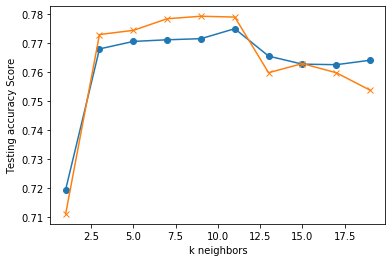

In [39]:
train_scores = []
test_scores = []

for k in range(1, 20, 2):
    # create the classifier for each value of K
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    #Score with both test and train data
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    
    #append the scores to our list of scores
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [40]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test, y_test))

C:\Users\steph\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


k=3 Test Acc: 0.763


In [41]:
new_hc_data = [[1,1,1,3,1,1,0,1,1,0,1]]
predicted_class = knn.predict(new_hc_data)
print(predicted_class)

[1.]


In [42]:
# centers_with_county_ranks['Health Center Site Population Type Code'].value_counts()

4.0    6487
1.0    4208
2.0    3221
3.0      60
Name: Health Center Site Population Type Code, dtype: int64